### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

### Loading Data

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### General Statistics of the dataframe

In [4]:
df = df.drop('CustomerID',1)

<ipython-input-4-6986afaad699>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('CustomerID',1)


In [5]:
df.shape

(200, 4)

In [6]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


What can we infer from above:
    - Everything seems normal except the Annual Income feature

In [7]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing data

### Data Visualization

In [8]:
num_data = ['Age','Annual Income (k$)' ,'Spending Score (1-100)']
cat_data = ['Gender']

<Figure size 432x432 with 0 Axes>

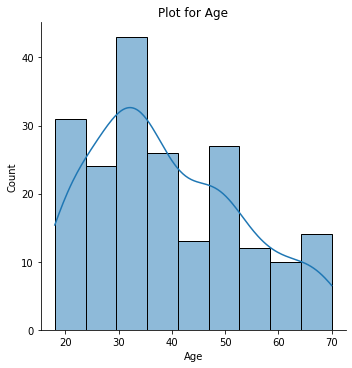

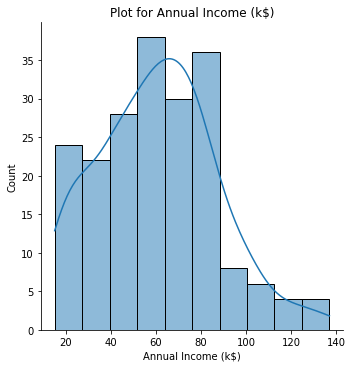

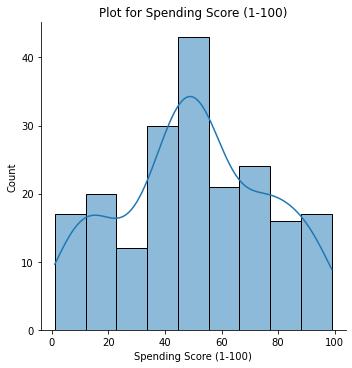

In [9]:
plt.figure(figsize=(6,6))
for i in num_data:
    sns.displot(df[i],kde=True)
    plt.title(f'Plot for {i}')

plt.show()

"Annual Income" Feature has a slight psotive skewness

<AxesSubplot:xlabel='Gender', ylabel='count'>

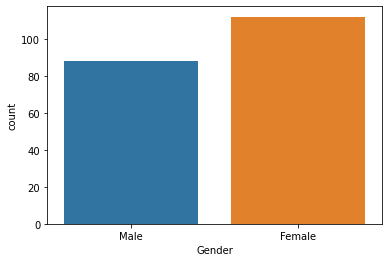

In [10]:
sns.countplot(x="Gender",data=df)

<AxesSubplot:>

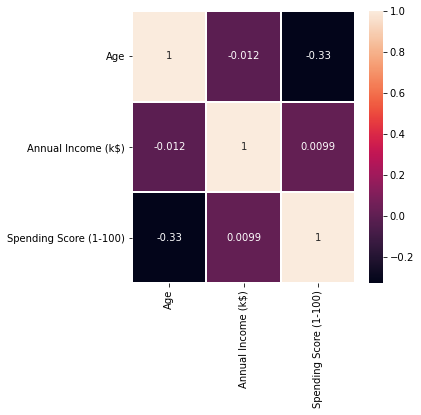

In [11]:
plt.figure(figsize=(5,5))
sns.heatmap(df[num_data].corr(),annot=True,linewidths=2)

No significant correlation

In [12]:
df.groupby("Gender")[num_data].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<AxesSubplot:xlabel='Gender', ylabel='Age'>

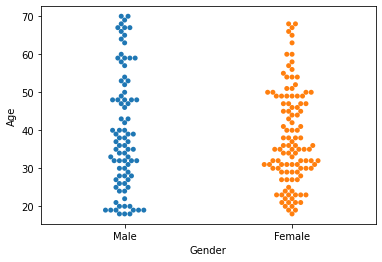

In [13]:
sns.swarmplot(x=df.Gender,y=df.Age)

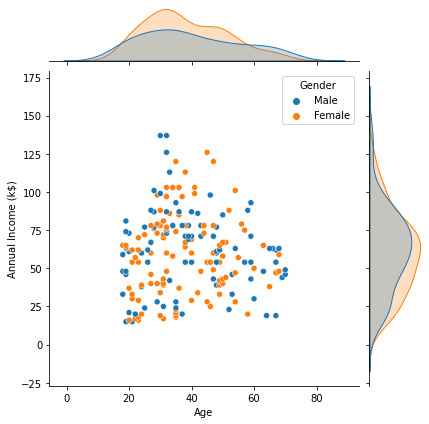

In [14]:
sns.jointplot(x=df['Age'], y=df['Annual Income (k$)'],data=df,hue='Gender')

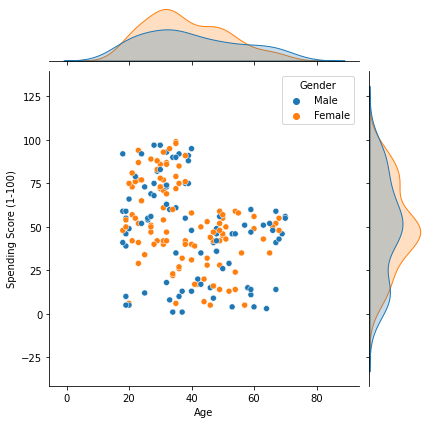

In [15]:
sns.jointplot(x=df['Age'], y=df['Spending Score (1-100)'],data=df, hue='Gender')

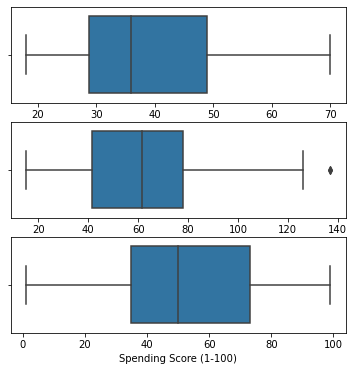

In [16]:
fig, axs=plt.subplots(nrows=3, figsize=(6,6))

sns.boxplot(x=df['Age'], ax=axs[0])
sns.boxplot(x=df['Annual Income (k$)'], ax=axs[1])
sns.boxplot(x=df['Spending Score (1-100)'], ax=axs[2])

for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
    
plt.show()

There are outliers in "Annual Income" feature in the dataframe

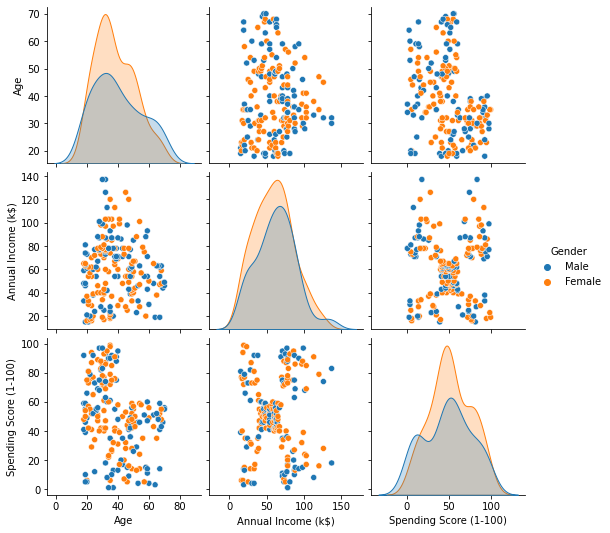

In [17]:
sns.pairplot(df,hue="Gender")

# Applying K-means clustering

K-means clustering is a clustering method that subdivides a single cluster or a collection of data points into K different clusters or groups. 

K-Means Algorithm
    -Selecting an appropriate value for K which is the number of clusters or centroids
    -Selecting random centroids for each cluster
    -Assigning each data point to its closest centroid
    -Adjusting the centroid for the newly formed cluster in step 4
    -Repeating step 4 and 5 till all the data points are perfectly organised within a cluster space

WCSS = 
WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.The idea is to minimise the sum. 

Elbow method =
We can find the optimum value for K using an Elbow point graph. We randomly initialise the K-Means algorithm for a range of K values and will plot it against the WCSS for each K value.

Drawback = 
One major drawback of K-Means clustering is the random initialisation of centroids. The formation of clusters is closely bound by the initial position of a centroid. The random positioning of the centroids can completely alter clusters and can result in a random formation.

Solution =
The solution is K-means++. K-Means++ is an algorithm that is used to initialise the K-Means algorithm.

K Means++

The algorithm is as follows:

    Choose one centroid uniformly at random from among the data points.
    For each data point say x, compute D(x), which is the distance between x and the nearest centroid that has already been chosen.
    Choose one new data point at random as a new centroid, using a weighted probability distribution where a point x is chosen with probability proportional to D(x)2.
    Repeat Steps 2 and 3 until K centres have been chosen.
    Proceed with standard k-means clustering.

In [18]:
X=df.iloc[:,[2,3]].values

In [19]:
from sklearn.cluster import KMeans

Using Elbow Method to find optimal number of clusters

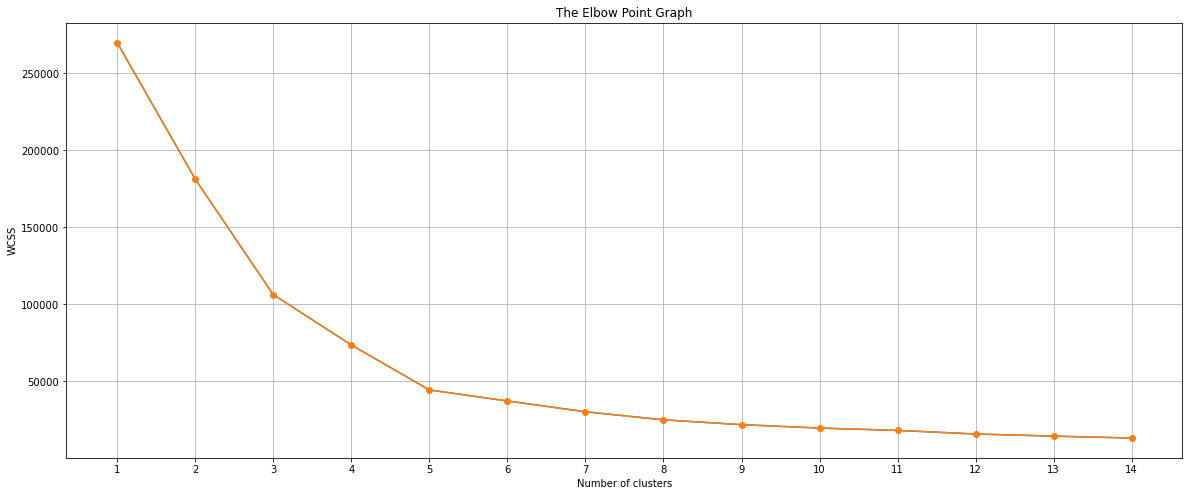

In [20]:
wcss = [] #Within-Cluster-Sum-of-Squares
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(20,8))  
plt.plot(range(1,15),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(range(1,15),wcss,"-o")
plt.xticks(range(1,15))
plt.grid(True)
plt.show()

#kmeans.inertia_ returns the WCSS value for an initialized cluster

After 3 the drop in wcss is minimal.So we choose 3 as optimal number of clusters

In [21]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 10)

y = kmeans.fit_predict(X)

In [22]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


### Visualising the Clusters

##### For Cluster 1

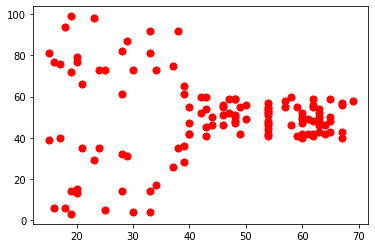

In [23]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 50, c = 'red', label = 'Cluster 1')

##### For Cluster 2

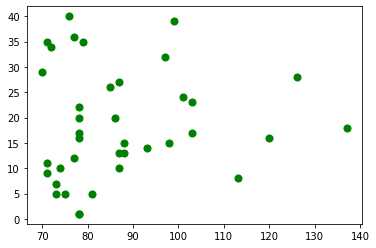

In [24]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 50, c = 'green', label = 'Cluster 2')

##### For Cluster 3

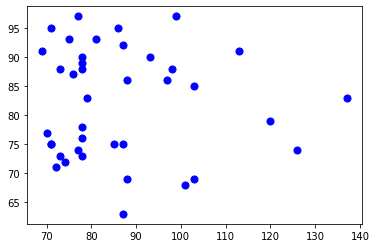

In [25]:
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 50, c = 'blue', label = 'Cluster 3')

##### Plot for label 'Centroids'


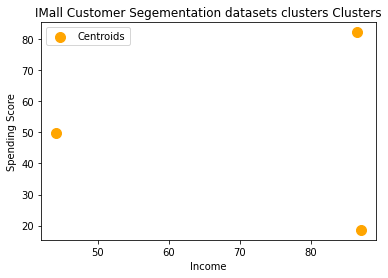

In [26]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'orange', label = 'Centroids')
plt.title('IMall Customer Segementation datasets clusters Clusters')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Text(0, 0.5, 'Spending Score')

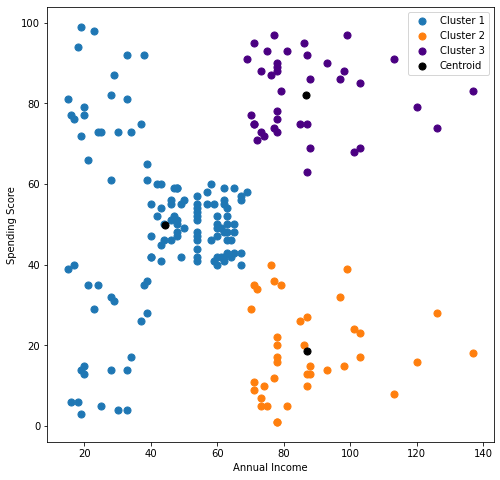

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(X[y == 0,0],X[y == 0,1],label = 'Cluster 1', s = 50)
plt.scatter(X[y == 1,0],X[y == 1,1],label = 'Cluster 2', s = 50)
plt.scatter(X[y == 2,0],X[y == 2,1],label = 'Cluster 3', s = 50,c='indigo')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'Centroid')
plt.legend()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

### Plotting original labels

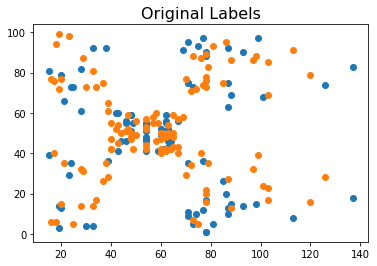

In [28]:
plt.title("Original Labels",fontsize=16)
plt.scatter(df['Annual Income (k$)'][df.Gender == "Male"],df['Spending Score (1-100)'][df.Gender == "Male"])
plt.scatter(df['Annual Income (k$)'][df.Gender == "Female"],df['Spending Score (1-100)'][df.Gender == "Female"])


Kmeans visibly did an good job with 2 clusters.I can say prediction is identical to the original with labels. Which shows that our ELBOW chart was right.

# Hierachial Clustering

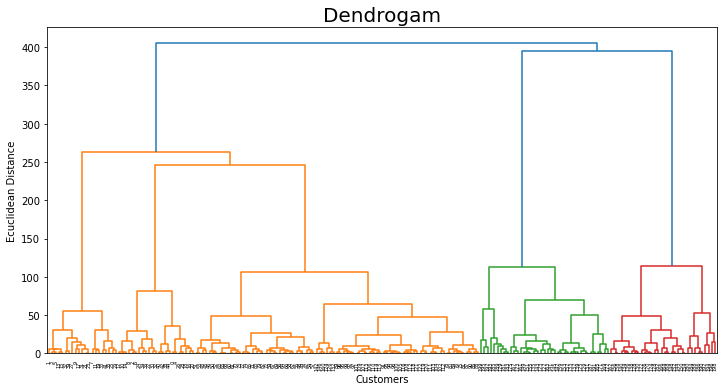

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize = (12,6))
dendo = dendrogram(linkage(X,method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')

plt.show()

We see that longest vertical line without any perpendecular matching lines (euclidian distances). If we draw a horizontal line between that values, we will have 2 or 3 interceptions which are representing ideal amount of labels

In [30]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y = ac.fit_predict(X)

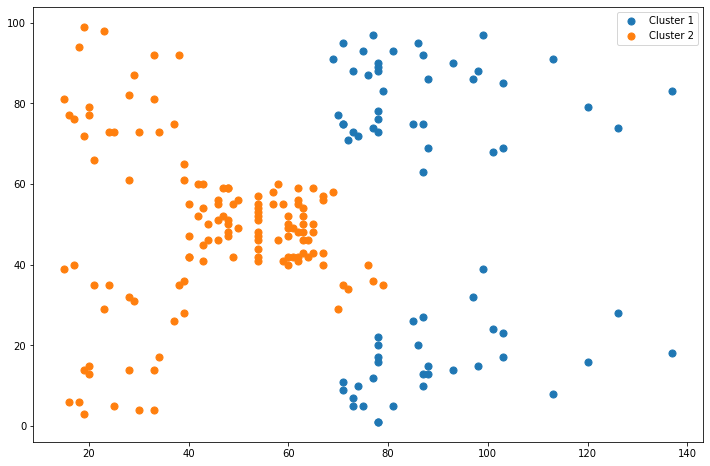

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(X[y == 0,0],X[y == 0,1],label = 'Cluster 1', s = 50)
plt.scatter(X[y == 1,0],X[y == 1,1],label = 'Cluster 2', s = 50)
plt.legend()

In [32]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y = ac.fit_predict(X)

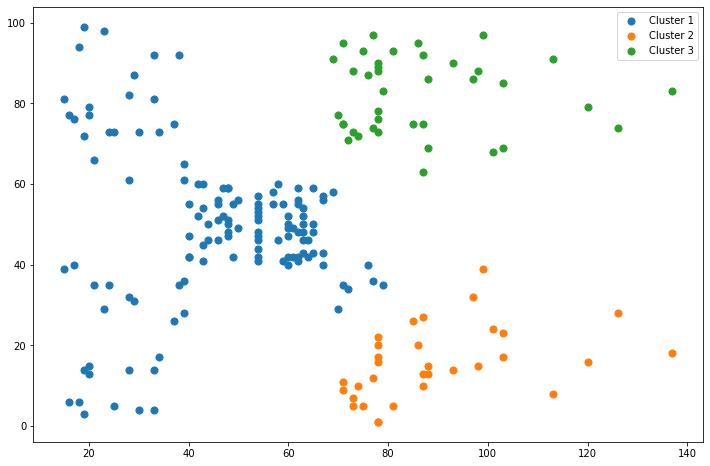

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(X[y == 0,0],X[y == 0,1],label = 'Cluster 1', s = 50)
plt.scatter(X[y == 1,0],X[y == 1,1],label = 'Cluster 2', s = 50)
plt.scatter(X[y == 2,0],X[y == 2,1],label = 'Cluster 3', s = 50)
plt.legend()

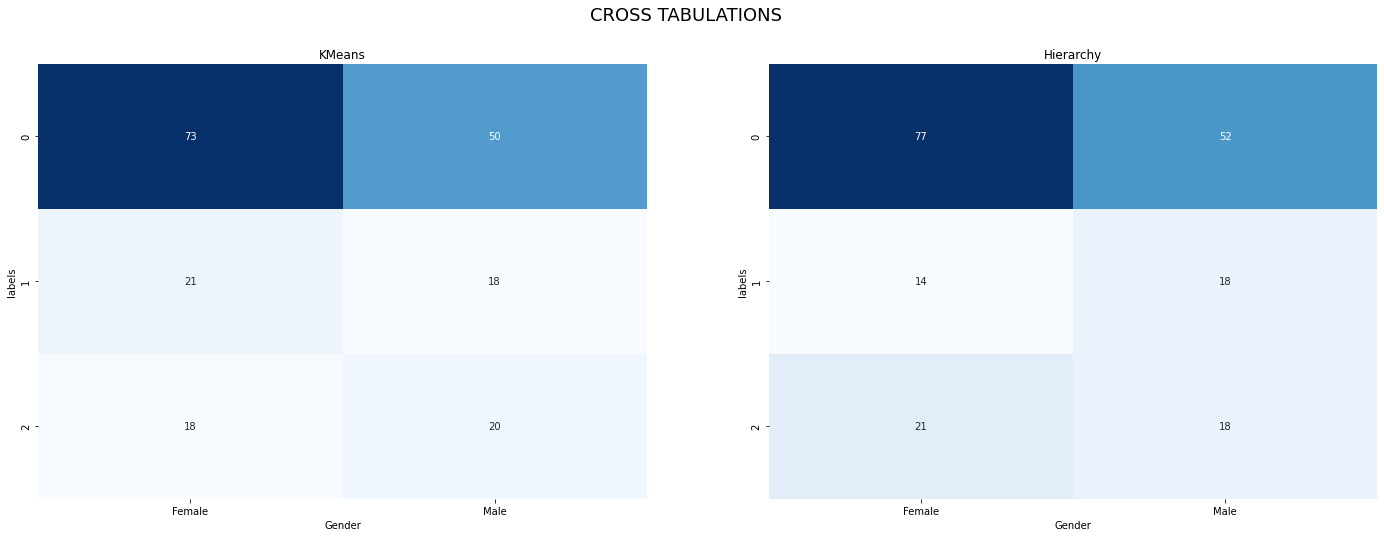

In [34]:
features = df.iloc[:,[2,3]]
#features.drop(["labels"],axis=1,inplace=True)

# kmeans
kmeans = KMeans(n_clusters=3)
kmeans_predict = kmeans.fit_predict(features)

# cross tabulation table for kmeans
df1 = pd.DataFrame({'labels':kmeans_predict,"Gender":df['Gender']})
ct1 = pd.crosstab(df1['labels'],df1['Gender'])


# hierarchy
hc_cluster = AgglomerativeClustering(n_clusters=3)
hc_predict = hc_cluster.fit_predict(features)

# cross tabulation table for Hierarchy
df2 = pd.DataFrame({'labels':hc_predict,"Gender":df['Gender']})
ct2 = pd.crosstab(df2['labels'],df2['Gender'])


plt.figure(figsize=(24,8))
plt.suptitle("CROSS TABULATIONS",fontsize=18)
plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(ct1,annot=True,cbar=False,cmap="Blues")

plt.subplot(1,2,2)
plt.title("Hierarchy")
sns.heatmap(ct2,annot=True,cbar=False,cmap="Blues")

plt.show()